Here I will be cleaning and transforming the given data to a desired format and will do some analysis on the same.

I have used pandas, pyplot and seaborn; hope it will be of help to novices like me and also would be interesting for you to read.

In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Some basic options in pandas for better readability and usage
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None) #automatic linebreaks and multiline cells

In [3]:
#read_csv to read the csv file
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

# Data Cleaning and Transformation

In [4]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

There are some columns, mainly *streams*, *in_shazam_charts* and *in_deezer_playlists* are of datatype object. We would need to convert them to int datatype if we use them for our analysis.

In [5]:
df.rename(columns={'artist(s)_name':"artists"}, inplace=True)

In [6]:
#checking for missing values

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

Here we can see that *is_shazam_charts* and *key* columns have some values missing in them.

The column "in_shazam_charts" can be null as it includes rank of the song on Shazam charts and a song might not always be on Shazam.

But a song will always have a key, so this column cannot be null.

**So we can replace the null values in *in_shazam_charts* with 0. There are also some values with ',' in between the numbers so we will also be taking care of that.**

**Since we dont know what the suitable key to add would be for the missing values and the key value plays an important role in our analysis we will remove the rows with null values for key column as to preserve the integrity of our dataset**

In [7]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)
df["in_shazam_charts"].fillna(0, inplace = True)
df['in_shazam_charts'] = df["in_shazam_charts"].astype(int)

print('Missing "in_shazam_charts" values after removal : ', df['in_shazam_charts'].isnull().sum())

Missing "in_shazam_charts" values after removal :  0


In [8]:
#remove the rows with missing key values
df = df.dropna(subset=['key'])

print('Missing "key" values after removal : ', df['key'].isnull().sum())

Missing "key" values after removal :  0


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [10]:
df.dtypes

track_name              object
artists                 object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [11]:
#find the categorical columns
df.select_dtypes(include=['object','bool','category']).columns.tolist()

['track_name', 'artists', 'streams', 'in_deezer_playlists', 'key', 'mode']

We will be using the *streams* and *in_deezer_playlists* columns in our analysis so we need to convert this column from categorical to numeric datatype.
We will first convert it to numeric which will convert the non-numeric values to NaN values which we will then replace with 0.

In [12]:
# Convert 'streams', 'in_deezer_playlists' columns to numerical data types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [13]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

streams                 1
in_deezer_playlists    75
dtype: int64

In [14]:
df['streams'].fillna(0, inplace=True)
df['streams'] = df['streams'].astype("int")
df['in_deezer_playlists'].fillna(0, inplace=True)

In [15]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [16]:
def to_month_name(month):
    month_names = ["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month_names[month]

In [17]:
df['released_month'] = (df['released_month']).apply(to_month_name)

You can download the new csv file after you run the cell below from Output under Data panel.

In [18]:
#get the csv file for visualization
df.to_csv('spotify-cleaned.csv', index=False)

In this dataset we can see that one song can also have multiple artists, so we will seperate out the artists into a list for further analysis.

In [19]:
# Turning the artists column into list instead of a single string
artists = []

for row in df['artists']:
    item = row.split(',')
    artists.append(item)

df['artists'] = artists
df.head()

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,July,14,553,147,141381703,43,263,45.0,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,[Myke Towers],1,2023,March,23,1474,48,133716286,48,126,58.0,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,June,30,1397,113,140003974,94,207,91.0,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[Taylor Swift],1,2019,August,23,7858,100,800840817,116,207,125.0,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[Bad Bunny],1,2023,May,18,3133,50,303236322,84,133,87.0,15,425,144,A,Minor,65,23,80,14,63,11,6


Flatten the artists column now to get a single list containing all the names in the artists column, even if they contain multiple artists for each song

In [20]:
artists_flattened = []
for item in artists:
    artists_flattened.extend(item)

#list comprehenstion to strip whitespaces after splitting the artists name
artists_flattened = [x.strip(' ') for x in artists_flattened]

# Analysis and Visualization
Now lets dive into the cleaned data and look for some interesting details and patterns.

Firstly let us look at which artist have the most songs on this dataset.

In [21]:
artists_true_counts = pd.Series(artists_flattened).value_counts()

Bad Bunny         36
Taylor Swift      32
The Weeknd        29
Kendrick Lamar    23
Feid              21
SZA               21
Drake             18
21 Savage         13
Metro Boomin      13
Harry Styles      13
Name: count, dtype: int64

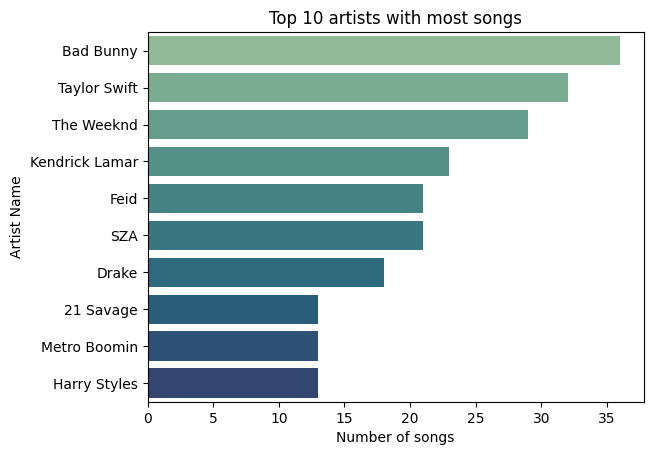

In [22]:
#Top 10 artists with most songs
top_artists = artists_true_counts.head(10)

sns.barplot(x=top_artists.values, y=top_artists.index, palette='crest')
plt.title("Top 10 artists with most songs")
plt.xlabel("Number of songs")
plt.ylabel("Artist Name")

top_artists

Text(0.5, 1.0, 'Top 10 songs streamed on Spotify')

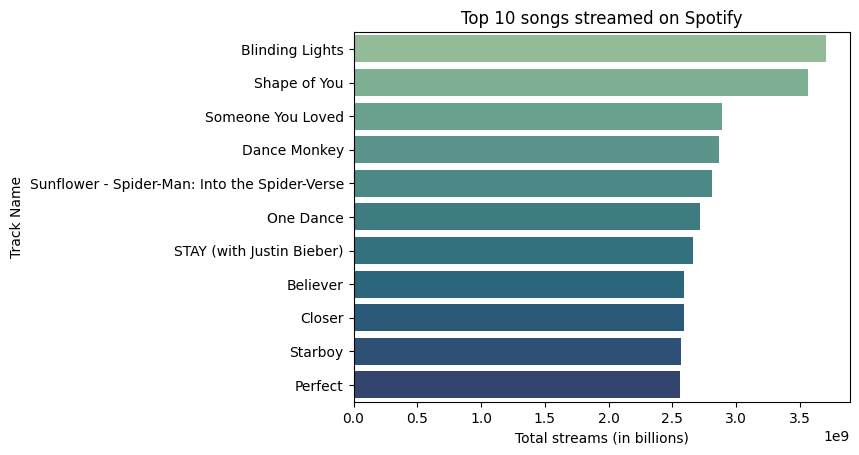

In [23]:
#Top 10 streamed songs on Spotify
top_streamed_spotify = df[['track_name', 'artists' , 'streams', 'released_year']].sort_values(by='streams', ascending=False);

sns.barplot(x=top_streamed_spotify[:11]['streams'], y=top_streamed_spotify[:11]['track_name'], palette='crest')
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")
plt.title("Top 10 songs streamed on Spotify")

Text(0.5, 1.0, 'Top 10 songs saved on Spotify playlists')

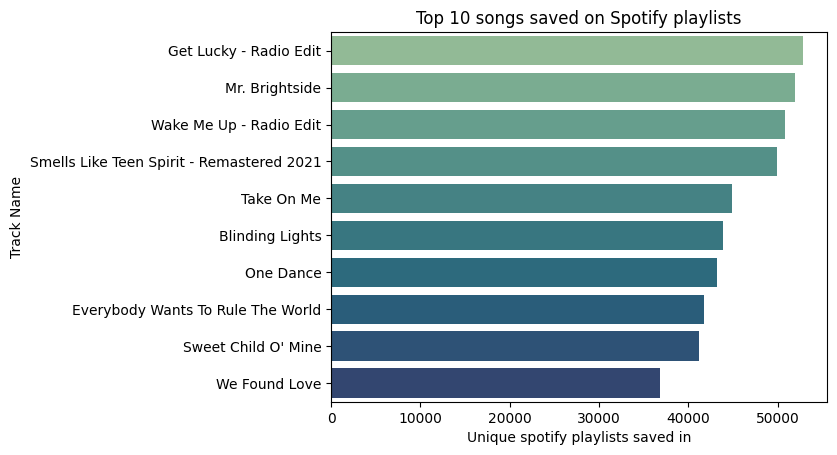

In [24]:
#Top 10 songs saved in Spotify playlists
top_in_spotify_playlists = df[['track_name', 'artists' , 'in_spotify_playlists']].sort_values(by='in_spotify_playlists', ascending=False).head(10);

sns.barplot(x=top_in_spotify_playlists['in_spotify_playlists'], y=top_in_spotify_playlists['track_name'], palette='crest')
plt.xlabel("Unique spotify playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Spotify playlists")

Text(0.5, 1.0, 'Top 10 songs saved on Apple playlists')

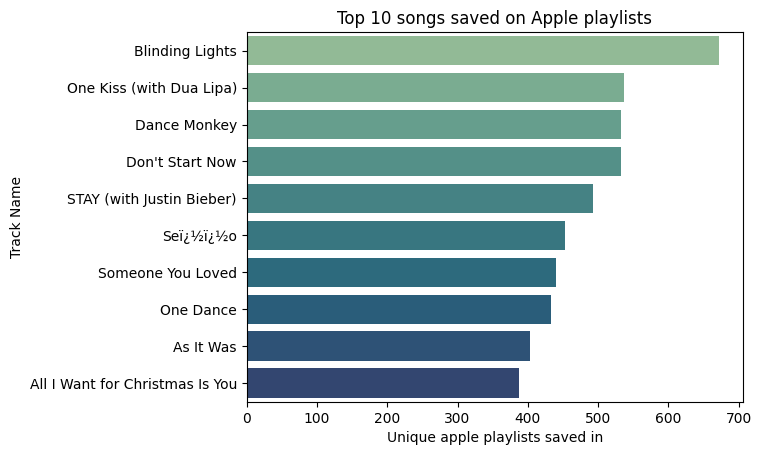

In [25]:
#Top 10 songs saved on Apple playlists
top_in_apple_playlists = df[['track_name', 'artists' , 'in_apple_playlists']].sort_values(by='in_apple_playlists', ascending=False).head(10);

sns.barplot(x=top_in_apple_playlists['in_apple_playlists'], y=top_in_apple_playlists['track_name'], palette='crest')
plt.xlabel("Unique apple playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Apple playlists")

Text(0.5, 1.0, 'Top 10 songs saved on Deezer playlists')

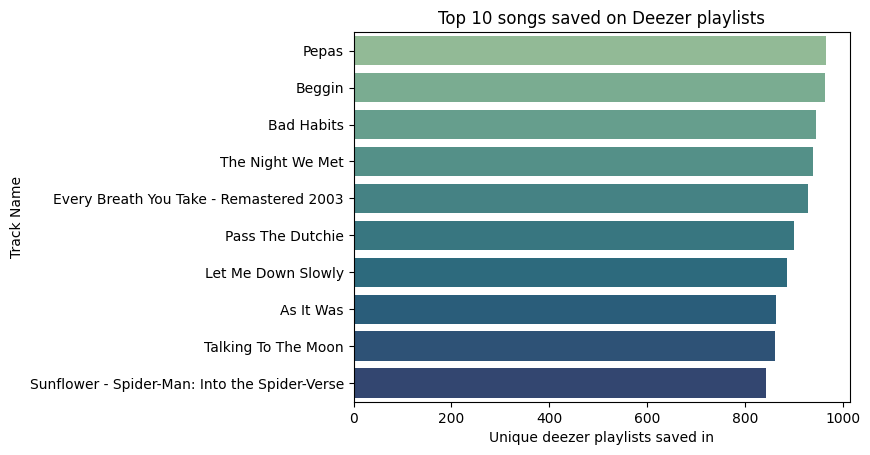

In [26]:
#Top 10 songs saved on Deezer playlists
top_in_deezer_playlists = df[['track_name', 'artists' , 'in_deezer_playlists']].sort_values(by='in_deezer_playlists', ascending=False).head(10);

sns.barplot(x=top_in_deezer_playlists['in_deezer_playlists'], y=top_in_deezer_playlists['track_name'], palette='crest')
plt.xlabel("Unique deezer playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Deezer playlists")

"Blinding Lights" seem to have a good performance overall on both Spotify and Apple platform.

In [27]:
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

In [28]:
cross_platform_corr_matrix = df[cross_platform_columns].corr()
cross_platform_corr_matrix

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
in_spotify_playlists,1.000000,0.173546,0.708098,0.259416,0.236444,0.147870,0.061743
in_spotify_charts,0.173546,1.000000,0.235219,0.552055,0.097009,0.581850,0.537464
in_apple_playlists,0.708098,0.235219,1.000000,0.408858,0.412618,0.359203,0.086826
in_apple_charts,0.259416,0.552055,0.408858,1.000000,0.163386,0.371166,0.390395
in_deezer_playlists,0.236444,0.097009,0.412618,0.163386,1.000000,0.274779,0.033729
in_deezer_charts,0.147870,0.581850,0.359203,0.371166,0.274779,1.000000,0.344083
in_shazam_charts,0.061743,0.537464,0.086826,0.390395,0.033729,0.344083,1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Cross-Platform Metrics')

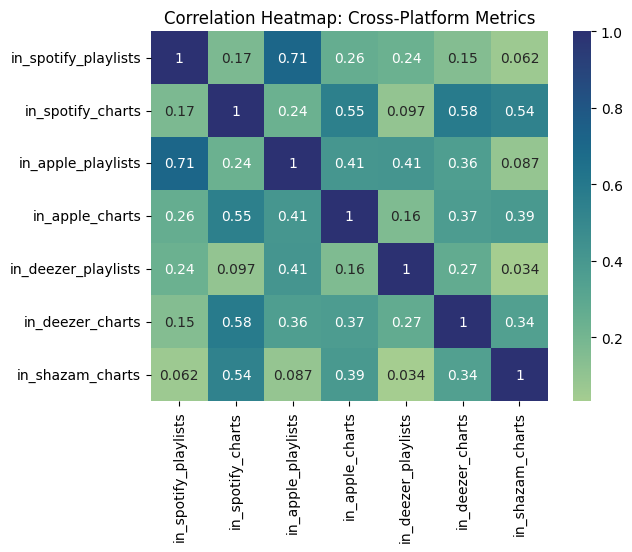

In [29]:
sns.heatmap(cross_platform_corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap: Cross-Platform Metrics')

Now let us look at some of the audio features across the dataset and analyse them.

Text(0.5, 1.0, "Correlation Heatmap: Song's Attribute Metrics")

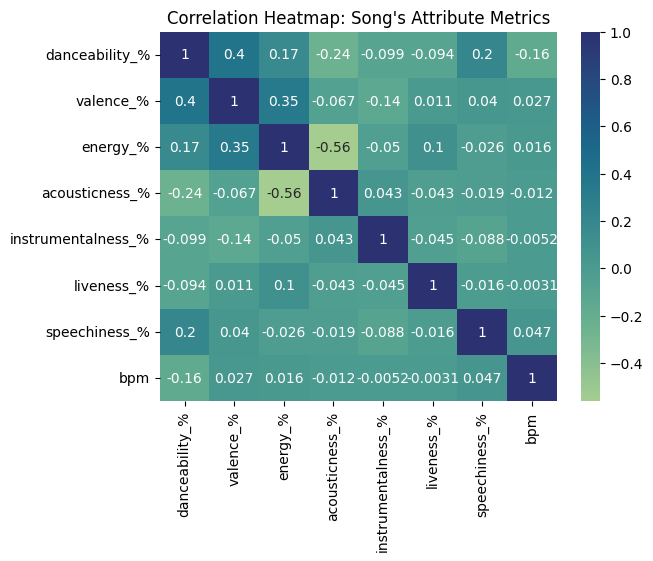

In [30]:
attribute_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
attribute_corr_matrix = df[attribute_columns].corr()
attribute_corr_matrix

sns.heatmap(attribute_corr_matrix, annot=True, cmap='crest')
plt.title("Correlation Heatmap: Song's Attribute Metrics")

**There is a negative relation between energy and acousticness.**

Which implies, the more acoustic the song is the less energy it has and vice versa.

Lets see how the audio features affect the total number of streams.

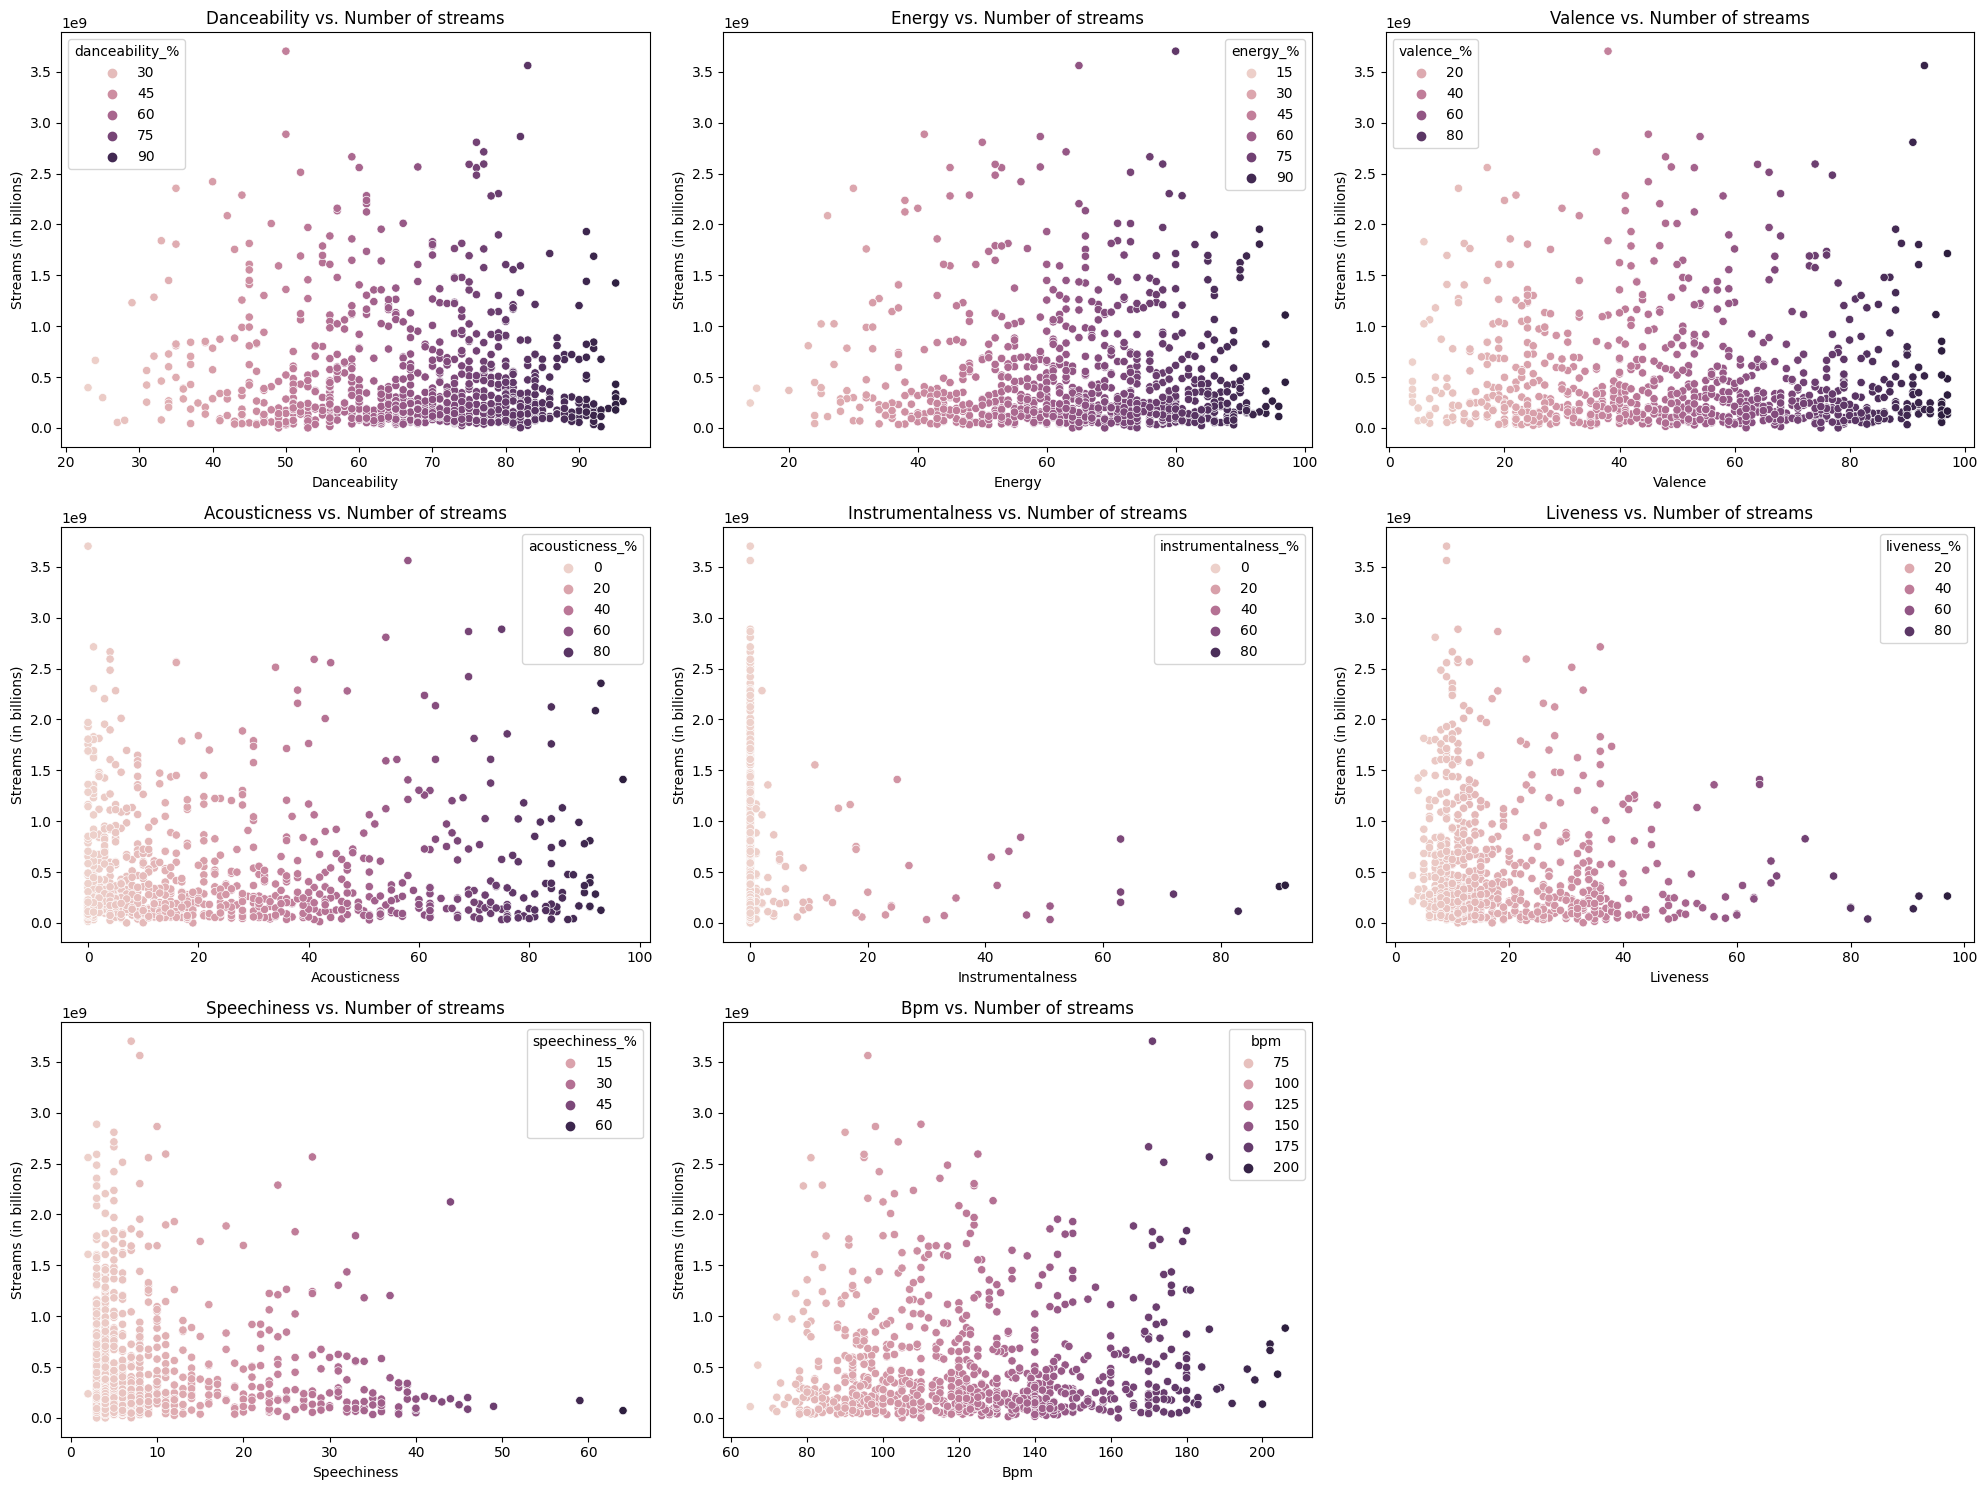

In [31]:
features_columns = ['danceability_%', 'energy_%', 'valence_%', "acousticness_%",  "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_columns, start=1):
    plt.subplot(3, 3, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'], hue=df[feature])
    
plt.tight_layout()

To finish it, lets look at the tops songs streamed on Spotify in the past few years.

released_year
2022    362
2023    159
2021    107
2019     33
2020     29
2017     21
2016     18
2014     13
2013     11
2018     10
Name: count, dtype: int64

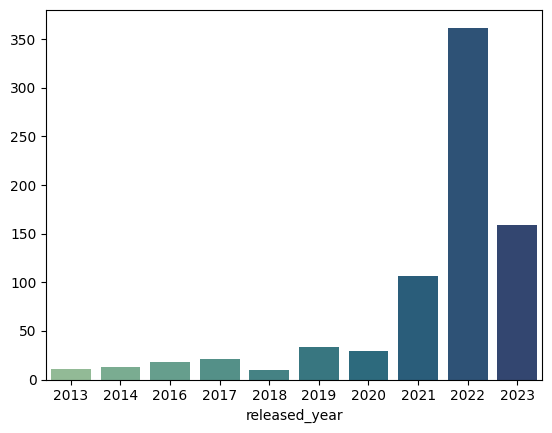

In [32]:
released_year = df['released_year'].value_counts().head(10)

sns.barplot(x=released_year.index, y=released_year.values ,palette='crest')

released_year

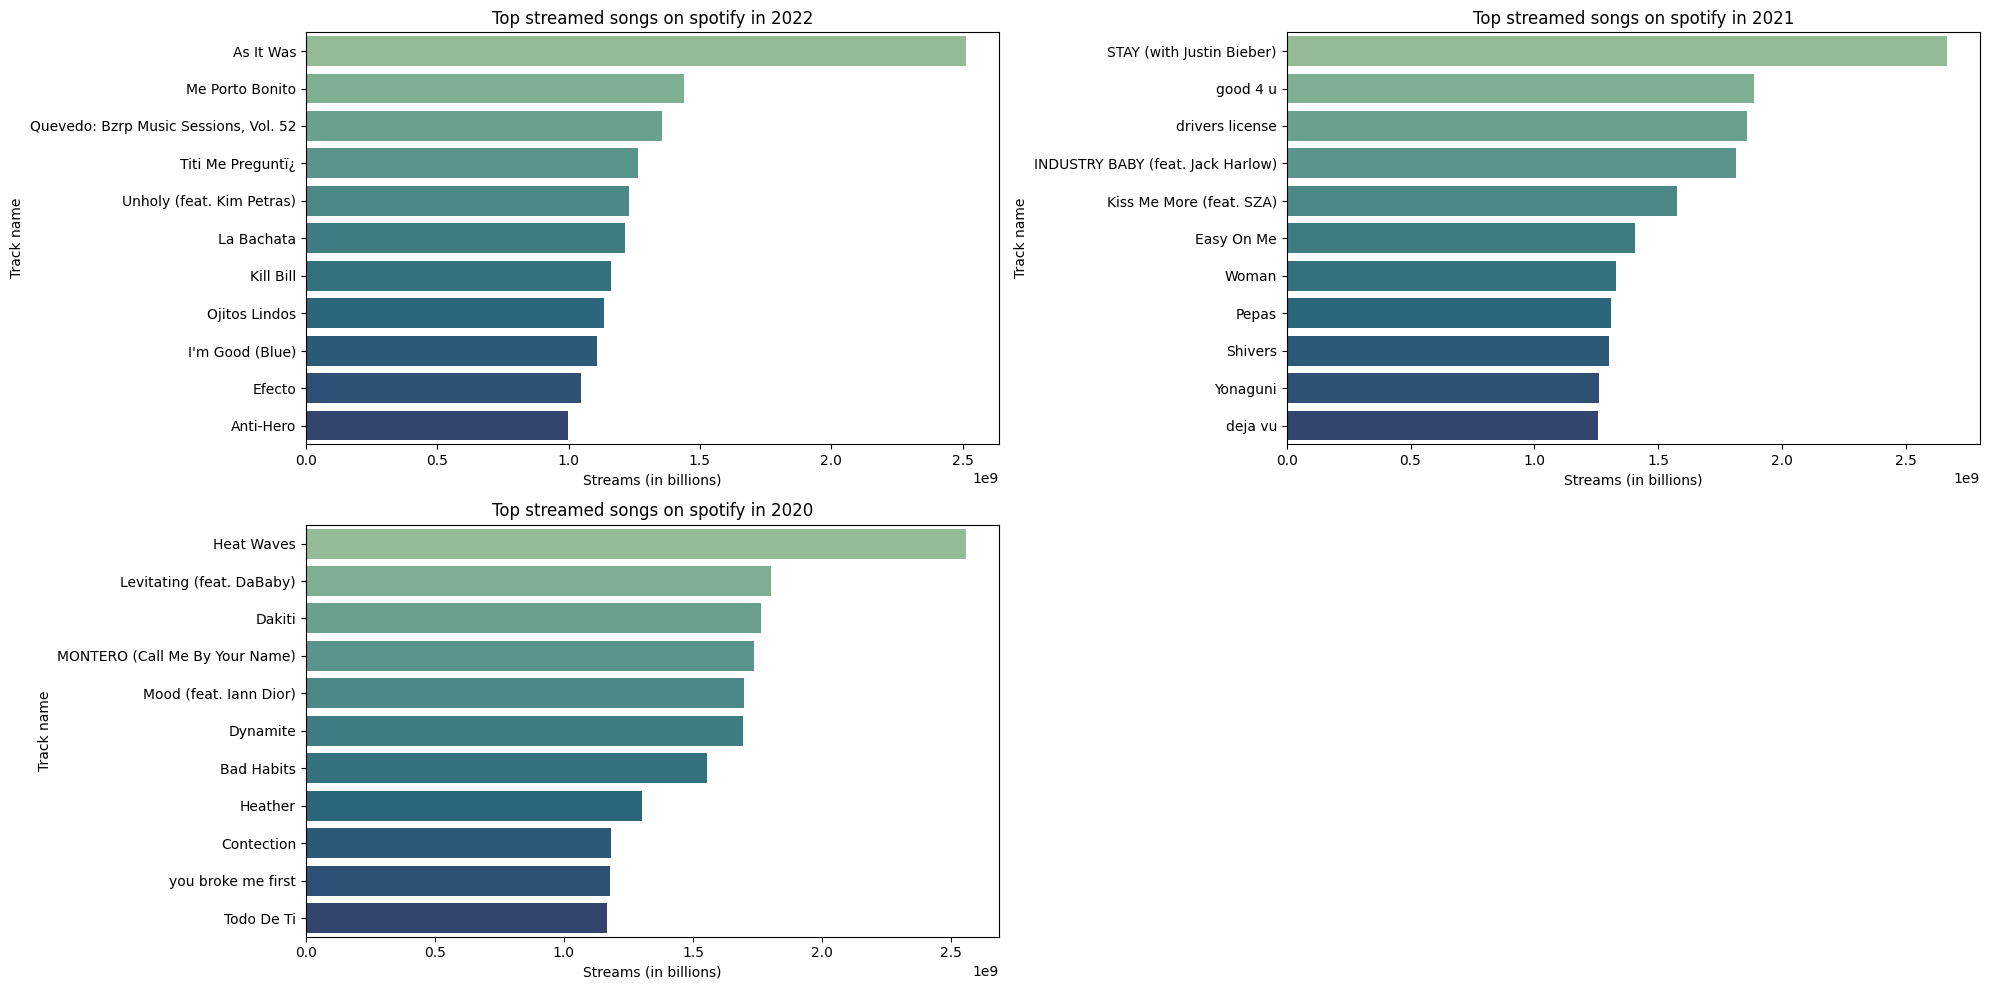

In [33]:
years = ['2022', '2021', '2020']

plt.figure(figsize=(20, 10))
for i, year in enumerate(years, start=1):
    plt.subplot(2, 2, i)
    top_spotify_songs = df[df.released_year == int(year)].sort_values(by='streams', ascending=False)
    sns.barplot(x = top_spotify_songs['streams'][:11], y = top_spotify_songs['track_name'][:11], palette = 'crest') 
    plt.title("Top streamed songs on spotify in " + year)
    plt.ylabel('Track name')
    plt.xlabel('Streams (in billions)')
    
plt.tight_layout()

Are there any familiar songs? Go on take a break and listen to some of them.

# Findings

* A song present in Spotify charts is likely to be also present in Apple and Deezer charts.
* Users are less likely to listen to Live songs, songs with more lyrics less music and songs with more music less lyrics.
* The given dataset contains most songs released in 2022, with some songs dating back to 1987 and latest up until July 2023.
* Looking at the overall best performing songs across Spotify, Apple and Deezer; "Blinding Lights" by The Weeknd was the most popular.
* Found a negative relation between energy and acousticness.